
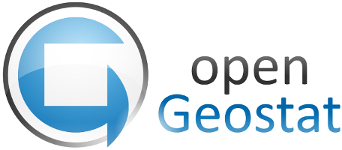

In [1]:
import declus
import pygslib

# test with arbitrary gslib files

In [2]:
parameters = {
    'datafl' : '../pygslib/data/cluster.dat',        # path to file, or none (to use '_xxx_.in') or numpy array (with columns [x,y])
    'icolx'  : 1,                                  # -columns for X, Y, Z and variable
    'icoly'  : 2,
    'icolz'  : 0,
    'icolvr' : 3,
    'tmin'   : -1.0e21,            # trimming limits min and max (raws out of this range will be ignored)
    'tmax'   : 1.0e21,
    'sumfl'  : None,      # path to the output summary file or None (to use '_xxs_.out')
    'outfl'  : None,      # path to the output file or None (to use '_xxx_.out')
    'anisy': 1.0,              # Y and Z cell anisotropies (Ysize=size*Yanis)
    'anisz': 1.0,
    'minmax' : 0,              # 0=look for minimum declustered mean (1=max)
    'ncell' : 24,               # number of cell sizes, min size, max size
    'cmin' : 1.0,
    'cmax' : 25.,
    'noff' : 5}                # number of origin offsets

In [3]:
result, sumary =declus.declus(parameters)

                  Parameters for DECLUS
                  *********************

START OF PARAMETERS:
../pygslib/data/cluster.dat                          -file with data
1 2 0 3                   -columns for X, Y, Z and variable
-1e+21 1e+21               -  trimming limits
_xxs_.out                     -file for summary output
_xxx_.out                     -file for output with data & weights
1.0 1.0             -Y and Z cell anisotropy (Ysize=size*Yanis)
0                    -0=look for minimum declustered mean (1=max)
24 1.0 25.0       -number of cell sizes, min size, max size
5                      -number of origin offsets


DECLUS Version: 2.906

 data file = ../pygslib/data/cluster.dat             
 columns =           1           2           0           3
 tmin,tmax =   -1.000000E+21    1.000000E+21
 summary file = _xxs_.out                               
 output file = _xxx_.out                               
 anisotropy =        1.000000        1.000000
 minmax flag =      

In [4]:
result.head()

,Xlocation,Ylocation,Primary,Secondary,Declustering Weight,Declustering Weight
0,39.5,18.5,0.06,0.22,1.619,1.281301
1,5.5,1.5,0.06,0.27,1.619,1.400103
2,38.5,5.5,0.08,0.40,1.416,1.613235
3,20.5,1.5,0.09,0.39,1.821,1.797446
4,27.5,14.5,0.09,0.24,1.349,1.430162


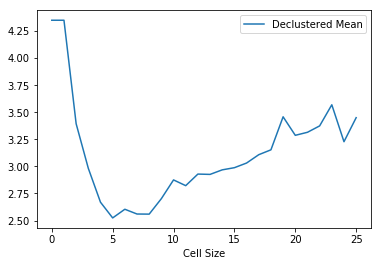

In [5]:
sumary.plot(x='Cell Size', y = 'Declustered Mean')

In [6]:
parameters['ncell'] = 1
parameters['cmin'] = 5
parameters['cmax'] = 5
parameters['noff'] = 8
result, sumary =declus.declus(parameters)
result.head()

                  Parameters for DECLUS
                  *********************

START OF PARAMETERS:
../pygslib/data/cluster.dat                          -file with data
1 2 0 3                   -columns for X, Y, Z and variable
-1e+21 1e+21               -  trimming limits
_xxs_.out                     -file for summary output
_xxx_.out                     -file for output with data & weights
1.0 1.0             -Y and Z cell anisotropy (Ysize=size*Yanis)
0                    -0=look for minimum declustered mean (1=max)
1 5 5       -number of cell sizes, min size, max size
8                      -number of origin offsets


DECLUS Version: 2.906

 data file = ../pygslib/data/cluster.dat             
 columns =           1           2           0           3
 tmin,tmax =   -1.000000E+21    1.000000E+21
 summary file = _xxs_.out                               
 output file = _xxx_.out                               
 anisotropy =        1.000000        1.000000
 minmax flag =           0

,Xlocation,Ylocation,Primary,Secondary,Declustering Weight,Declustering Weight
0,39.5,18.5,0.06,0.22,1.619,1.281815
1,5.5,1.5,0.06,0.27,1.619,1.398337
2,38.5,5.5,0.08,0.40,1.416,1.658356
3,20.5,1.5,0.09,0.39,1.821,1.773488
4,27.5,14.5,0.09,0.24,1.349,1.435911


# test with numpy array


In [7]:
result['Zlocation']=0
parameters = {
    'datafl' : result[['Xlocation','Ylocation','Zlocation','Primary']].values,       
    'tmin'   : -1.0e21, 
    'tmax'   : 1.0e21,
    'sumfl'  : None,      
    'outfl'  : None,     
    'anisy': 1.0,            
    'anisz': 1.0,
    'minmax' : 0,            
    'ncell' : 24,             
    'cmin' : 1.0,
    'cmax' : 25.,
    'noff' : 5}   

                  Parameters for DECLUS
                  *********************

START OF PARAMETERS:
_xxx_.in                          -file with data
1 2 3 4                   -columns for X, Y, Z and variable
-1e+21 1e+21               -  trimming limits
_xxs_.out                     -file for summary output
_xxx_.out                     -file for output with data & weights
1.0 1.0             -Y and Z cell anisotropy (Ysize=size*Yanis)
0                    -0=look for minimum declustered mean (1=max)
24 1.0 25.0       -number of cell sizes, min size, max size
5                      -number of origin offsets


DECLUS Version: 2.906

 data file = _xxx_.in                                
 columns =           1           2           3           4
 tmin,tmax =   -1.000000E+21    1.000000E+21
 summary file = _xxs_.out                               
 output file = _xxx_.out                               
 anisotropy =        1.000000        1.000000
 minmax flag =           0
 ncell min m

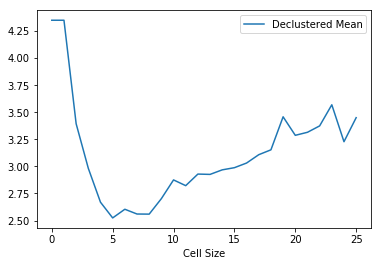

In [8]:
result, sumary =declus.declus(parameters)
result.head()
sumary.plot(x='Cell Size', y = 'Declustered Mean')